**3.1** Import the file **gold.csv**. There are two unique columns **Pred** and **new**. One of the columns is a linear combination of OHLC prices while the other is a polynomial function of the same inputs. Also one of the columns is partially filled.
* Complete the entire column.
* Mention which column is a linear function and which is polynomial.



Coefficient :  [[0.01093116]]
Error :  73183.02443912858


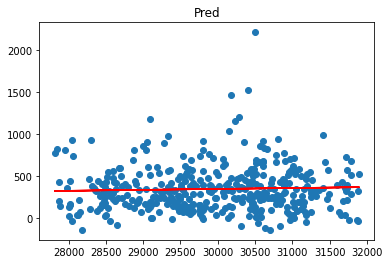

Coefficient :  [[0.02635764]]
Error :  41122.55731655557


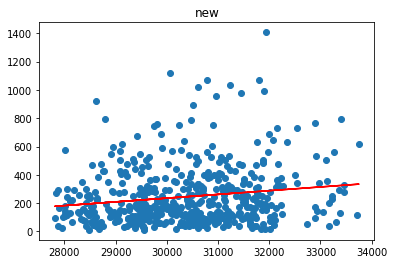

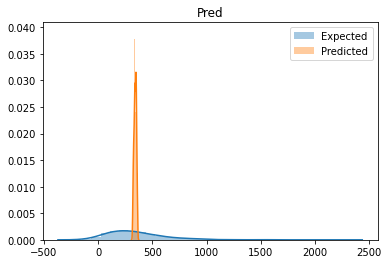

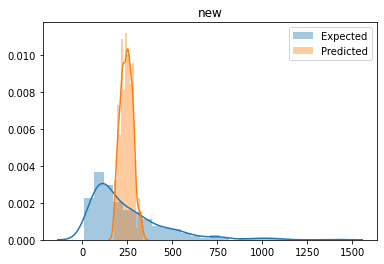

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as MSE

%matplotlib inline

gold = pd.read_csv('data/GOLD.csv')

# gold.corr()   # since there is no column named Close, we'd assume that the Price refers to Close. Checking the correlation between the columns.
# sns.pairplot(gold)
# from the correlation values and the pairplot, it is quite evident that the OHLC values are strongly correlated, one of the main features of the regression using OLS is that the independent variables must not be correlated and hence we'd be regressing the model only over one of the OHLC

#gold['Price'].dropna().shape   # checking which column has NA values
#gold['Pred'].dropna().shape
#gold['new'].dropna().shape

inputData = gold['Price'].values.reshape(-1,1)    # not a good idea to not split input data into training set and test set
input411 = gold.dropna()['Price'].values.reshape(-1,1)   # inputs with NA dropped to be compatible with Pred
expectedPred = gold.dropna()['Pred'].values.reshape(-1,1)   # since Pred contains NA, we need to drop it
expectedNew = gold['new'].values.reshape(-1,1)

lrmodel1 = LR()
lrmodel1.fit(input411,expectedPred)
outputPred411 = lrmodel1.predict(input411)    # predictions without the NA columns, not predicting NA values

print('Coefficient : ',lrmodel1.coef_,'. Intercept : ',lrmodel1.intercept_)
print('Error : ',MSE(expectedPred,outputPred411))   # checking for the accuracy of the predictions

plt.scatter(input411,expectedPred)
plt.plot(input411,outputPred411,'r')
plt.title('Pred')
plt.show()

lrmodel2 = LR()
lrmodel2.fit(inputData,expectedNew)
outputNew = lrmodel2.predict(inputData)

print('\nCoefficient : ',lrmodel2.coef_,'. Intercept : ',lrmodel2.intercept_)
print('Error : ',MSE(expectedNew,outputNew))

plt.scatter(inputData,expectedNew)
plt.plot(inputData,outputNew,'r')
plt.title('new')
plt.show()

outputPred = lrmodel1.predict(inputData)    # predicting NA values for Pred column

gold['newPred'] = outputPred   # new columnn for model output values of Pred
gold['newOut'] = outputNew
# gold.loc[gold['Pred'].isna(),'Pred'] = gold.loc[gold['Pred'].isna(),'newPred']   # filling NA values in Pred column
# gold['Pred'].dropna().shape    # checking whether the NAs have been filled
# gold.head(10)   # checking the new dataframe

sns.distplot(expectedPred,label='Expected')
sns.distplot(outputPred411,label='Predicted')
plt.legend()
plt.title('Pred')
plt.show()

sns.distplot(expectedNew,label='Expected')
sns.distplot(outputNew,label='Predicted')
plt.legend()
plt.title('new')
plt.show()

Coefficients :  [[ 2.  3. -1. -4.]]
Error :  4.399396047452331e-22


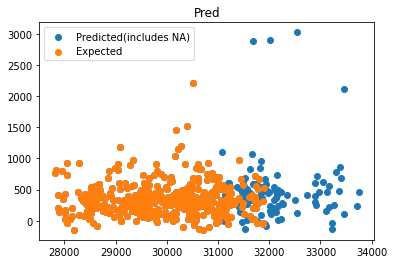

Coefficients :  [[ 1.01293825 -1.0003835   1.00503772 -1.01765453]]
Error :  0.4790920338666642


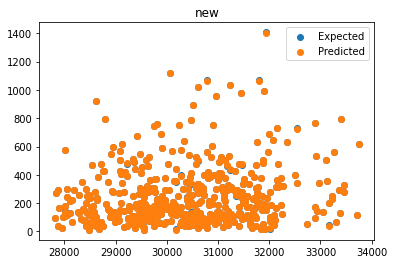

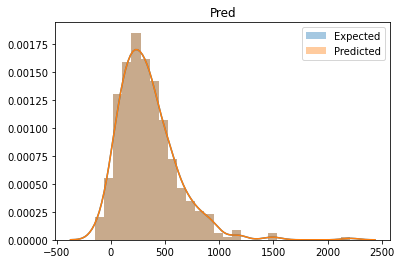

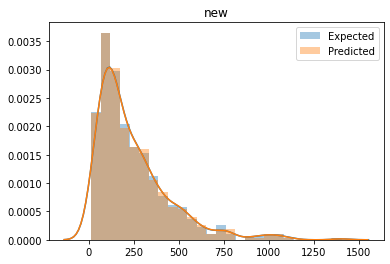

In [0]:
# although this shouldn't be done as OHLC are correlated with each other. The worst case of overfitting ever seen.

inputDatas = gold[['Price','Open','High','Low']].values.reshape(-1,4)
inputs411 = gold.dropna()[['Price','Open','High','Low']].values.reshape(-1,4)
lrmodel3 = LR()
lrmodel3.fit(inputs411,expectedPred)

outputsPred = lrmodel3.predict(inputDatas)
outputsPred411 = lrmodel3.predict(inputs411)

print('Coefficients : ',lrmodel3.coef_,'. Intercept : ',lrmodel3.intercept_)
print('Error : ',MSE(expectedPred,outputsPred411))

plt.scatter(inputData,outputsPred,label='Predicted(includes NA)')
plt.scatter(input411,expectedPred,label='Expected')
plt.legend()
plt.title('Pred')
plt.show()

gold['overfittedPred'] = outputsPred
gold['overfittedNew'] = outputsNew
# gold.corr()   # checking the correlation after calculating new columns

lrmodel4 = LR()
lrmodel4.fit(inputDatas,expectedNew)

outputsNew = lrmodel4.predict(inputDatas)

print('\nCoefficients : ',lrmodel4.coef_,'. Intercept : ',lrmodel4.intercept_)
print('Error : ',MSE(expectedNew,outputsNew))

# coefficients = np.array(lrmodel4.coef_)
# oneMore = inputDatas.dot(coefficients.transpose())    # just for checking the coefficients
# oneMore.shape

plt.scatter(inputData,expectedNew,label='Expected')
plt.scatter(inputData,outputsNew,label='Predicted')
# plt.scatter(inputData,oneMore,label='Anotherone')
plt.legend()
plt.title('new')
plt.show()

sns.distplot(expectedPred,label='Expected')
sns.distplot(outputsPred411,label='Predicted')
plt.legend()
plt.title('Pred')
plt.show()

sns.distplot(expectedNew,label='Expected')
sns.distplot(outputsNew,label='Predicted')
plt.legend()
plt.title('new')
plt.show()

# there are two ways to fill NaN values in the Pred column but since the question explicitly said Pred is a linear combination of OHLC, we'll use overfittedPred to fill Pred. Also the correlation between them is 1.
gold.loc[gold['Pred'].isna(),'Pred'] = gold.loc[gold['Pred'].isna(),'overfittedPred']   # filling NA values in Pred column
# gold['Pred'].dropna().shape   # checking whether the NAs have been filled

The coefficient estimates for Ordinary Least Squares rely on the independence of the features. When features are correlated and the columns of the design matrix  have an approximate linear dependence, the design matrix becomes close to singular and as a result, the least-squares estimate becomes highly sensitive to random errors in the observed target, producing a large variance. This situation of multicollinearity can arise, for example, when data are collected without an experimental design. (From sklearn docs).

From the error measurement and the coefficients of the overfittedPred and overfittedNew model. And since the correlation between **Pred** and **overFittedPred** is **1**, the **Pred** column seems to be linear. Also it was **Pred** that consisted of NaN values.

**3.2** Using linear regression, calculate :


*   The daily return Beta value for the last three months
*   The monthly return Beta value



In [0]:
stock = pd.read_csv('data/Mid_Cap/APOLLOTYRE.csv',index_col='Date',parse_dates=True)
nifty = pd.read_csv('data/Nifty50.csv',index_col='Date',parse_dates=True)

0.00026368221900319877
1.107388066446684
-0.001758316619890302


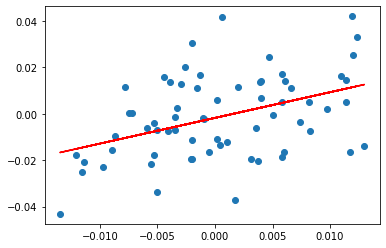

The daily return for the days of this month and 3 months prior to this month has a beta value of : 1.107388066446684


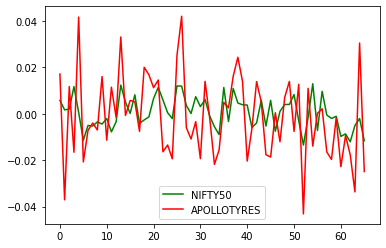

In [228]:
stock['pctChangeDaily'] = stock['Close Price'].pct_change().fillna(0)
nifty['pctChangeDaily'] = nifty['Close'].pct_change().fillna(0)

# ri = alpha + beta*rm; ri is stock's return(here, Y). rm is market returns(here, X). beta is coefficient of LR model, and alpha is the intercept

lastidx = stock.index[-1]   # the most recent date is at the end of this dataframe
Y = stock.loc[(stock.index.month >= lastidx.month-3)&(stock.index.year == lastidx.year),'pctChangeDaily'].values.reshape(-1,1)
X = nifty.loc[(nifty.index.month >= lastidx.month-3)&(nifty.index.year == lastidx.year),'pctChangeDaily'].values.reshape(-1,1)

lrmodel5 = LR()
lrmodel5.fit(X,Y)
line = lrmodel5.predict(X)    # for plotting purpose

beta = lrmodel5.coef_[0,0]
alpha = lrmodel5.intercept_[0]
error = MSE(Y,line)
print(error,beta,alpha,sep='\n')

plt.scatter(X,Y)
plt.plot(X,line,'r')
plt.show()

print('The daily return for the days of this month and 3 months prior to this month has a beta value of :',beta)

plt.plot(X,'g',label='NIFTY50')
plt.plot(Y,'r',label='APOLLOTYRES')
plt.legend()
plt.show()

In [0]:
def monthlyClose(X,arg1):   # function for returning close price at the last day of month available in the dataframe. parameters : dataframe and column
  years = X.index.year.unique().values
  month = X.index.month.unique().values[0]

  j = years[0]
  i = month-1
  end = years[-1]
  monthlyClosePrice = []

  while(i<month or j<end):
    i = (i+1)
    # print(i,j)
    price = X.loc[(X.index.year == j)&(X.index.month == i),arg1].values[-1]
    monthlyClosePrice.append(price)
    j = j+(i//12)
    i=i%12

  Xdict = {'MonthClosePrice':monthlyClosePrice}
  return Xdict

0.005601772783771979
0.8142701408540592
-0.01077899206687058


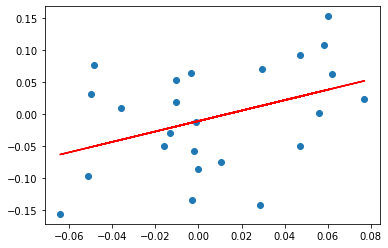

The monthly returns for the data captured in entire dataframe has a beta value of : 0.8142701408540592


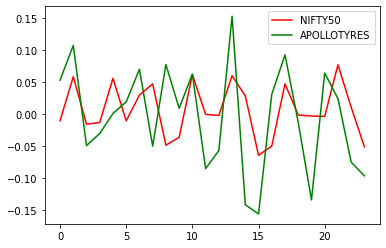

In [229]:
stockMonthlydf = pd.DataFrame(monthlyClose(stock,'Close Price'))    # Calculating on the Close Price, Average Price could be used too
stockMonthlydf['MonthPerChange'] = stockMonthlydf['MonthClosePrice'].pct_change().fillna(0)

niftyMonthlydf = pd.DataFrame(monthlyClose(nifty,'Close'))
niftyMonthlydf['MonthPerChange'] = niftyMonthlydf['MonthClosePrice'].pct_change().fillna(0)

Y = stockMonthlydf.iloc[1:,1].values.reshape(-1,1)
X = niftyMonthlydf.iloc[1:,1].values.reshape(-1,1)

lrmodel6 = LR()
lrmodel6.fit(X,Y)
line = lrmodel6.predict(X)    # for plotting purpose

beta = lrmodel6.coef_[0,0]
alpha = lrmodel6.intercept_[0]
error = MSE(Y,line)
print(error,beta,alpha,sep='\n')

plt.scatter(X,Y)
plt.plot(X,line,'r')
plt.show()

print('The monthly returns for the data captured in entire dataframe has a beta value of :',beta)

plt.plot(X,'r',label='NIFTY50')
plt.plot(Y,'g',label='APOLLOTYRES')
plt.legend()
plt.show()

According to **Investopedia**, Beta is a measure of stock's volatility, in relation to overall market. By definition the market, here NIFTY50 has a beta value of 1 and individual stocks are ranked according to how much they deviate from the market. The possible scenarios for Beta is :
* If the Beta of a stock is greater than 1, then it implies that the stock is more volatile than the market.
* If the Beta is lower than 1, then it implies that the stock is less volatile than the market, it moves less than the market.
High Beta stocks are supposed to be riskier but provide higher return potential. Low Beta stocks pose less risk but also lower returns.

In the case of **APOLLOTYRES** and **NIFTY50** :
* The Beta for daily returns over past three months was more than 1, implying that the stock has been more volatile than the index.
* The Beta for monthly returns over a duration of two years was less than 1, implying the stock moved less monthwise over the years.

Considering the scenario where Beta is negative would mean that the stock had an opposite movement than that of the index, implying either the stock has generated negative returns over the duration or the index on which it is being tested has generated such kind of returns. Choose both the stock and the index wisely.